In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime

#words counter
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.tokenize import word_tokenize


# sentiment 
from textblob import TextBlob


In [2]:
# load data
files = ['csv/2020-01.csv', 'csv/2020-02.csv', 'csv/2020-03.csv', 'csv/2020-04.csv', 'csv/2020-05.csv']
# read files
df_month = [pd.read_csv(i) for i in files]
# concatenate files
df = pd.concat(df_month)

/Users/allen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15205667 entries, 0 to 960492
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id_str      object
 1   created_at  object
 2   state       object
 3   sentiment   object
 4   text_clean  object
dtypes: object(5)
memory usage: 696.1+ MB


In [5]:
df.isnull().sum(axis = 0)

id_str              0
created_at        210
state         1040415
sentiment           0
text_clean     105700
dtype: int64

In [6]:
# delete the null row by 'text_clean'
df = df[df['text_clean'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15099967 entries, 0 to 960492
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id_str      object
 1   created_at  object
 2   state       object
 3   sentiment   object
 4   text_clean  object
dtypes: object(5)
memory usage: 691.2+ MB


In [7]:
df.isnull().sum(axis = 0)

id_str              0
created_at        210
state         1032616
sentiment           0
text_clean          0
dtype: int64

In [8]:
# delete the null row by 'state'
df = df[df['state'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14067351 entries, 0 to 960492
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id_str      object
 1   created_at  object
 2   state       object
 3   sentiment   object
 4   text_clean  object
dtypes: object(5)
memory usage: 644.0+ MB


In [9]:
import re, datetime
def extract_date(x):
#     match = re.search('\d{2}-\d{2}', x)
#     date = datetime.datetime.strptime(match.group(), '%m-%d').date()
    x_list = x.split(' ')
    month = '1' if x_list[1] == 'Jan' else '2' if x_list[1] == 'Feb' else '3' if x_list[1] =='Mar' else '4' if x_list[1] == 'Apr' else '5' if x_list[1] == 'May' else'others'
    if len(x_list[2]) == 1:
        x_list[2] = '0' + x_list[2]
    date = month + '/' + x_list[2] + '/' + '20'
    return date
df['date'] = df['created_at'].apply(lambda x: extract_date(x))
df.head()

id_str                      created_at         state  \
0  1219856157608566784  Wed Jan 22 05:35:46 +0000 2020    California   
2  1219856816114487296  Wed Jan 22 05:38:23 +0000 2020     Wisconsin   
3  1219856906270990336  Wed Jan 22 05:38:44 +0000 2020  Pennsylvania   
4  1219857010696630272  Wed Jan 22 05:39:09 +0000 2020      New York   
6  1219858026242416640  Wed Jan 22 05:43:11 +0000 2020    New Jersey   

  sentiment                                         text_clean     date  
0  positive  momsdemand brendaof fun fact  accidental death...  1/22/20  
2  positive  troopax johnmaamd ravin coqundoodledoo edwardh...  1/22/20  
3  negative                    brutal season protect yourself   1/22/20  
4  positive  wish administrators cdc could impeached failin...  1/22/20  
6  positive  united states first confirmed case new virus a...  1/22/20

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14067351 entries, 0 to 960492
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id_str      object
 1   created_at  object
 2   state       object
 3   sentiment   object
 4   text_clean  object
 5   date        object
dtypes: object(6)
memory usage: 751.3+ MB


# 1. Data Visualization

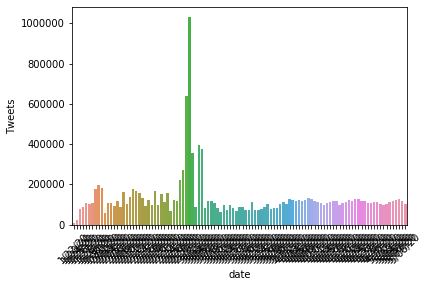

In [11]:
# tweets count per day
df = df[df['date'] != '1/21/20']
order = sorted(df['date'].unique())
plt.figure()
ax = sns.countplot(x='date', data=df, order=sorted(df['date'].unique()))
ax.set_ylabel('Tweets')
plt.xticks(rotation=45)
plt.show()

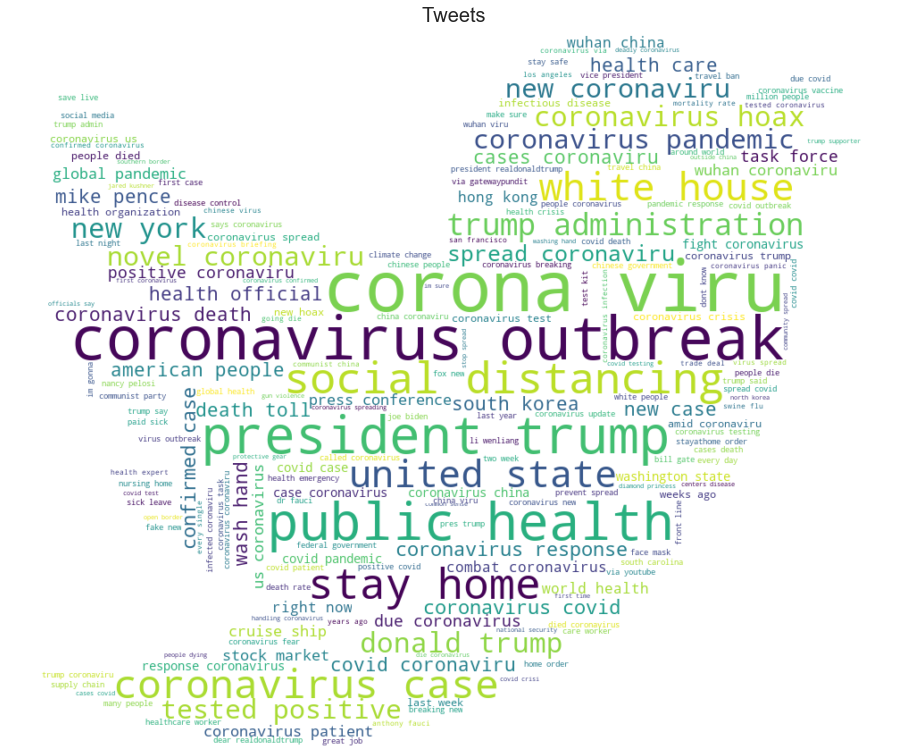

In [12]:
#words cloud of most comman words 
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Tweets',size=20)
plt.show()

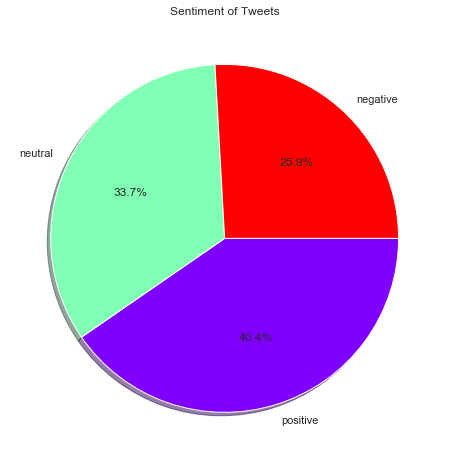

In [13]:
import matplotlib.cm as cm
plt.figure(figsize=(8,8))
#count data rating
counts = df['sentiment'].value_counts()
#rating pie
values = counts.values
labels = counts.index
explode = (0, 0, 0)
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(values, 
        colors=colors, 
        labels=labels,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False,
        shadow=True)
plt.title('Sentiment of Tweets')
plt.show()

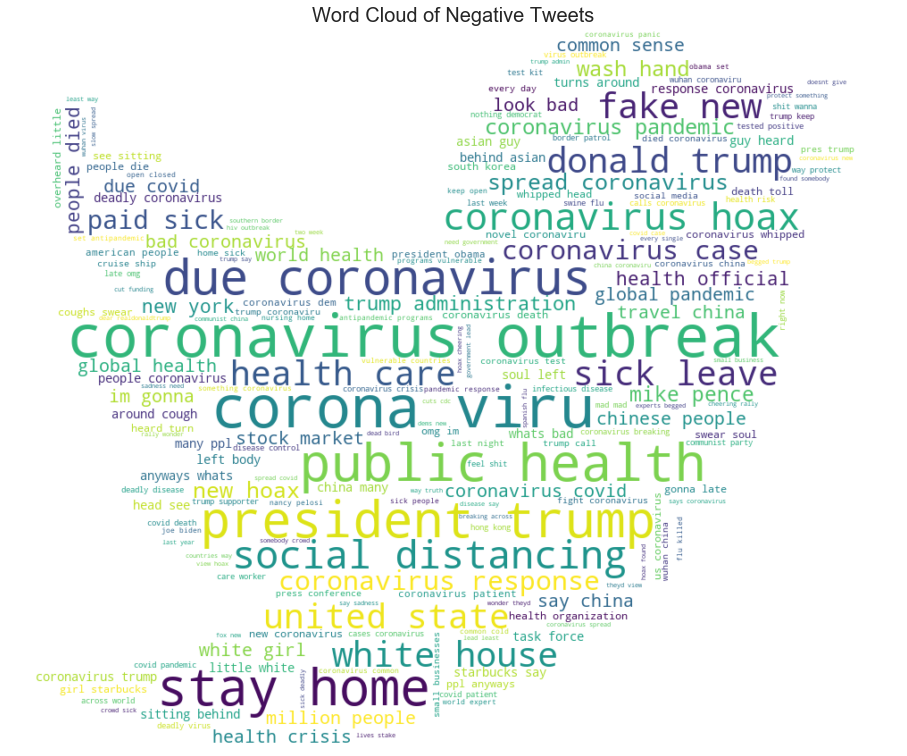

In [14]:
#words cloud of most comman words from negative tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='negative'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Negative Tweets',size=20)
plt.show()

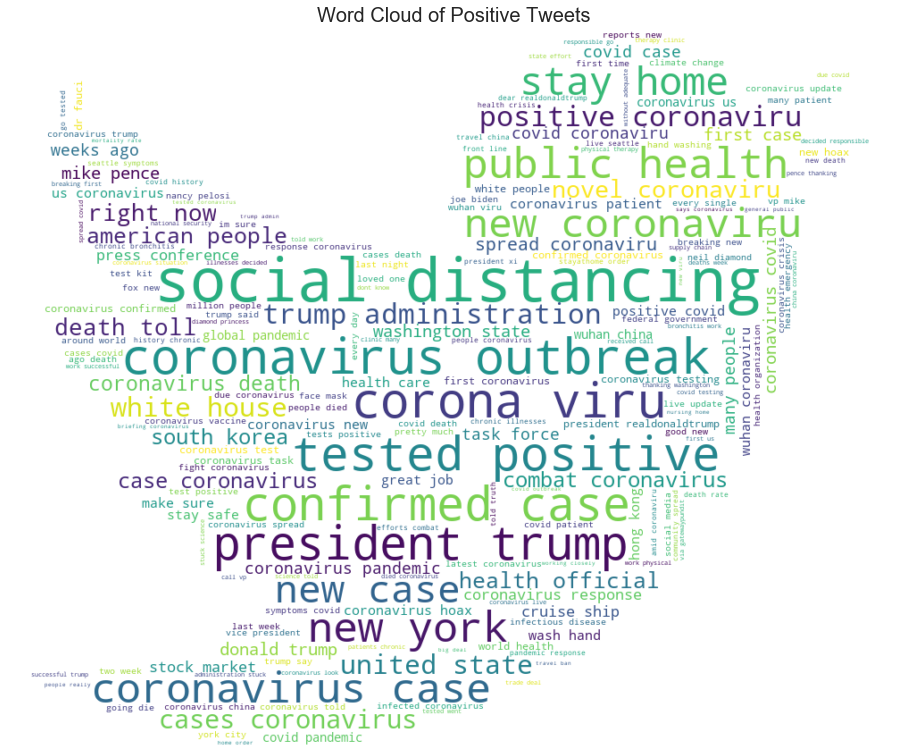

In [15]:
#words cloud of most comman words from positive tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='positive'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Positive Tweets',size=20)
plt.show()

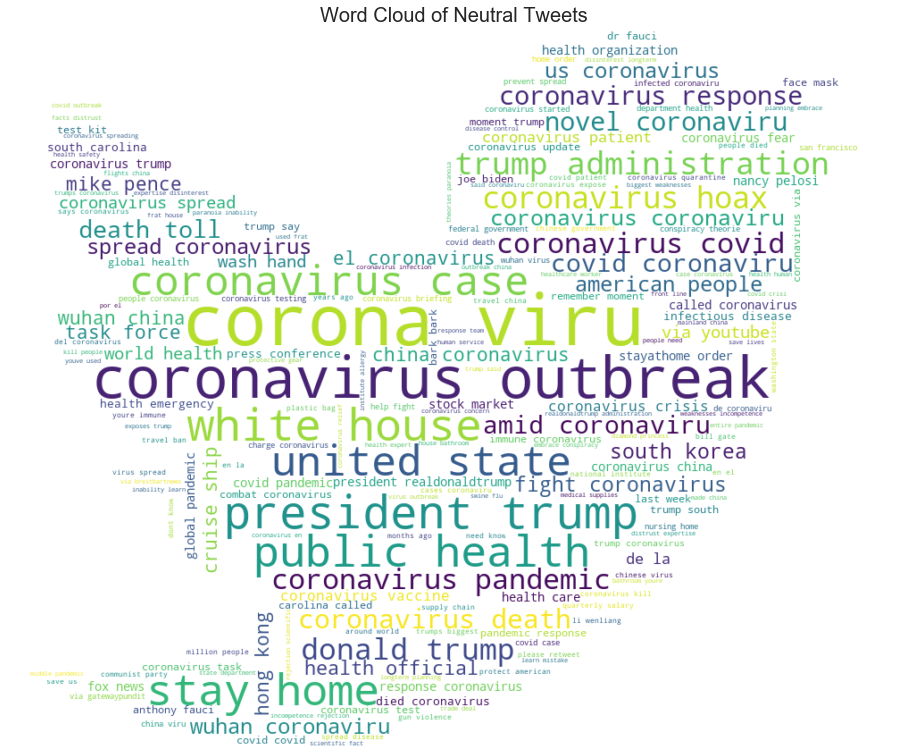

In [16]:
#words cloud of most comman words from neutral tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='neutral'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Neutral Tweets',size=20)
plt.show()

In [17]:
from settings import states_full_dic
df['state_abb'] = df['state'].apply(lambda x: states_full_dic[x] if x is not np.nan else x)
df.head()

id_str                      created_at         state  \
0  1219856157608566784  Wed Jan 22 05:35:46 +0000 2020    California   
2  1219856816114487296  Wed Jan 22 05:38:23 +0000 2020     Wisconsin   
3  1219856906270990336  Wed Jan 22 05:38:44 +0000 2020  Pennsylvania   
4  1219857010696630272  Wed Jan 22 05:39:09 +0000 2020      New York   
6  1219858026242416640  Wed Jan 22 05:43:11 +0000 2020    New Jersey   

  sentiment                                         text_clean     date  \
0  positive  momsdemand brendaof fun fact  accidental death...  1/22/20   
2  positive  troopax johnmaamd ravin coqundoodledoo edwardh...  1/22/20   
3  negative                    brutal season protect yourself   1/22/20   
4  positive  wish administrators cdc could impeached failin...  1/22/20   
6  positive  united states first confirmed case new virus a...  1/22/20   

  state_abb  
0        CA  
2        WI  
3        PA  
4        NY  
6        NJ

In [18]:
states_abb = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [19]:
Counter(df['state']).most_common()

[('California', 2158436),
 ('Texas', 1403055),
 ('Florida', 1080607),
 ('New York', 975047),
 ('Washington', 730977),
 ('Pennsylvania', 467658),
 ('Illinois', 449744),
 ('Georgia', 420535),
 ('Ohio', 412404),
 ('Arizona', 366005),
 ('North Carolina', 360366),
 ('Michigan', 355864),
 ('Massachusetts', 347903),
 ('Virginia', 332489),
 ('New Jersey', 294315),
 ('Colorado', 284702),
 ('Oregon', 272777),
 ('Tennessee', 259501),
 ('Maryland', 249890),
 ('Minnesota', 212021),
 ('Missouri', 201107),
 ('Indiana', 187858),
 ('Nevada', 174974),
 ('Wisconsin', 170156),
 ('Louisiana', 156907),
 ('South Carolina', 147333),
 ('Kentucky', 140877),
 ('Connecticut', 135697),
 ('Oklahoma', 117096),
 ('Utah', 90271),
 ('Kansas', 88411),
 ('Arkansas', 84077),
 ('Alabama', 81972),
 ('Iowa', 79341),
 ('New Mexico', 70170),
 ('Hawaii', 68085),
 ('Maine', 66544),
 ('Nebraska', 65918),
 ('Idaho', 63784),
 ('Mississippi', 61903),
 ('Montana', 49216),
 ('West Virginia', 48318),
 ('Alaska', 47787),
 ('New Hampshir

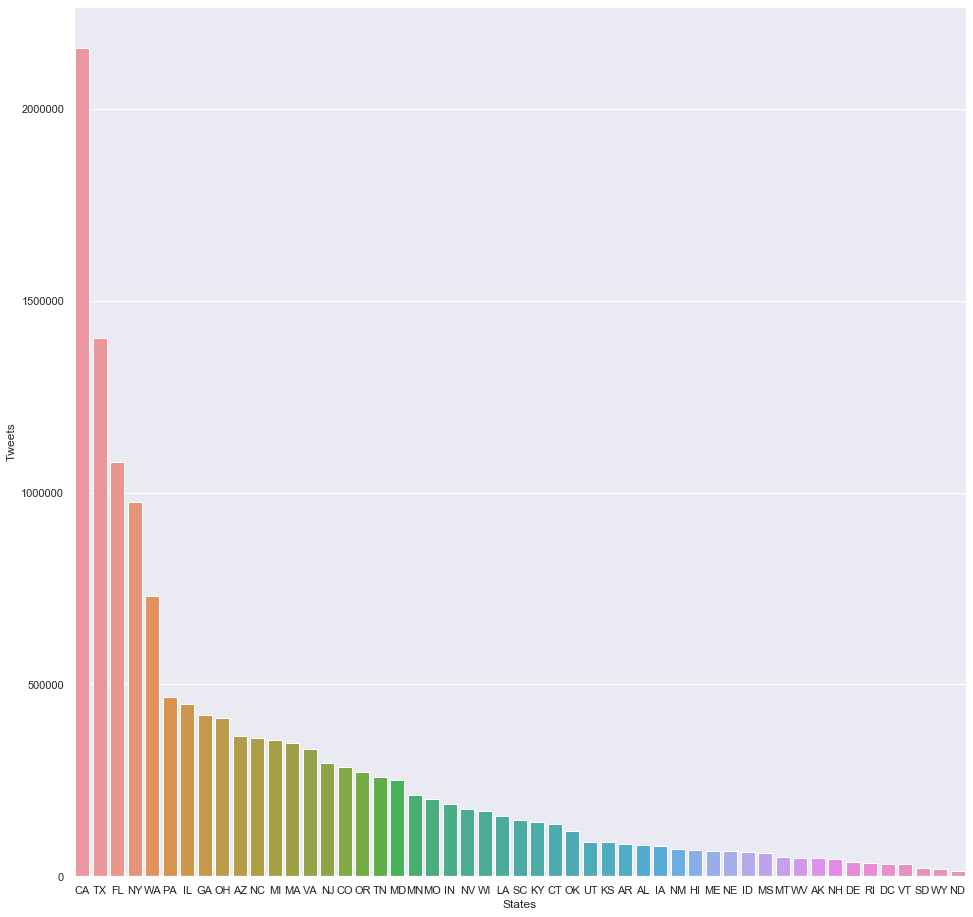

In [20]:
# tweets count per day
plt.figure()
ax = sns.countplot(x='state_abb', data=df, order=df['state_abb'].value_counts().index)
ax.set_ylabel('Tweets')
ax.set_xlabel('States')
plt.show()

In [21]:
from plotly.offline import iplot
from settings import states_abb
# tweets per state
tweets_perstate = np.asarray(df.groupby('state_abb').state_abb.count())

tweets_scale = [[0, 'rgb(229, 239, 245)'], [1, 'rgb(1, 97, 156)']]

data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = tweets_scale,
        locations = states_abb,
        locationmode = 'USA-states',
        z = tweets_perstate,
        marker = dict(
            line = dict(
                color = 'rgb(255, 255, 255)',
                width = 2)
            ),
        colorbar = dict(
            title = 'Tweets per state')
        )]

layout = dict(
         title = 'United States Heatmap of Tweets Related to COVID-19',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             countrycolor = 'rgb(255, 255, 255)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

figure = dict(data = data, layout = layout)
iplot(figure)

# 2. Correlation analysis

## 2.1 Correlation of total tweets and cases for each state

In [23]:
df_us = pd.read_csv('csv/time_series_covid19_confirmed_US.csv')
df_us.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  \
0 -14.2710 -170.1320  ...      0       0       0       0       0        0   
1  13.4443  144.7937  ...    145     149     149     151     151      151   
2  15.0979  145.6739  ...     14      15      15      15      16       16   
3  18.2208  -66.5901  ...   1924    1968    2031    2156    2173     2198   
4  18.3358  -64.8963  ...     66      66      66      68      68       69   

   5/11/20  5/12/20  5/13/20  5/14/20  
0        0        0        0        0  
1      151      152      152      152  
2       19       19       19       19  
3     2256     2299     2329     2427  
4       69       69       69       69  

[5 rows x 125 columns]

In [24]:
df_states = df_us.groupby('Province_State').sum().reset_index()
df_states.head()

Province_State         UID  code3      FIPS          Lat        Long_  \
0         Alabama  5796241491  57960  241491.0  2203.246784 -5809.578199   
1          Alaska  2604232344  26040  232344.0  1747.579877 -4229.319334   
2  American Samoa          16     16      60.0   -14.271000  -170.132000   
3         Arizona  1428230216  14280  230216.0   505.138555 -1671.948482   
4        Arkansas  6468550635  64680  550635.0  2618.391704 -6932.548370   

   1/22/20  1/23/20  1/24/20  1/25/20  ...  5/5/20  5/6/20  5/7/20  5/8/20  \
0        0        0        0        0  ...    8437    8691    9046    9385   
1        0        0        0        0  ...     371     372     374     377   
2        0        0        0        0  ...       0       0       0       0   
3        0        0        0        0  ...    9305    9707    9945   10526   
4        0        0        0        0  ...    3525    3611    3703    3747   

   5/9/20  5/10/20  5/11/20  5/12/20  5/13/20  5/14/20  
0    9668     9889    10164    10464    10700    11101  
1     378      379      379      383      383      383  
2       0        0        0        0        0        0  
3   10960    11119    11383    11736    12216    12674  
4    3747     4012     4043     4164     4236     4366  

[5 rows x 120 columns]

In [25]:
from settings import states_full_dic
df_date = df_states.drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_'])
df_date['state'] = df_states['Province_State']
df_date['state_abb'] = df_date['state'].apply(lambda x: states_full_dic[x] if x in states_full_dic else np.nan)
df_date.head()

Province_State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0         Alabama        0        0        0        0        0        0   
1          Alaska        0        0        0        0        0        0   
2  American Samoa        0        0        0        0        0        0   
3         Arizona        0        0        0        0        1        1   
4        Arkansas        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  5/7/20  5/8/20  5/9/20  5/10/20  5/11/20  \
0        0        0        0  ...    9046    9385    9668     9889    10164   
1        0        0        0  ...     374     377     378      379      379   
2        0        0        0  ...       0       0       0        0        0   
3        1        1        1  ...    9945   10526   10960    11119    11383   
4        0        0        0  ...    3703    3747    3747     4012     4043   

   5/12/20  5/13/20  5/14/20           state  state_abb  
0    10464    10700    11101         Alabama         AL  
1      383      383      383          Alaska         AK  
2        0        0        0  American Samoa         AS  
3    11736    12216    12674         Arizona         AZ  
4     4164     4236     4366        Arkansas         AR  

[5 rows x 117 columns]

In [26]:
tweets_count = Counter(df['state'])
df_date['tweets_count'] = df_date['state'].apply(lambda x: tweets_count[x])
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 118 entries, Province_State to tweets_count
dtypes: int64(115), object(3)
memory usage: 53.6+ KB


In [27]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 118 entries, Province_State to tweets_count
dtypes: int64(115), object(3)
memory usage: 53.6+ KB


In [29]:
cases_date = '5/8/20'
total_cases = df_date['tweets_count'].sum()
total_tweets = df_date[cases_date].sum()

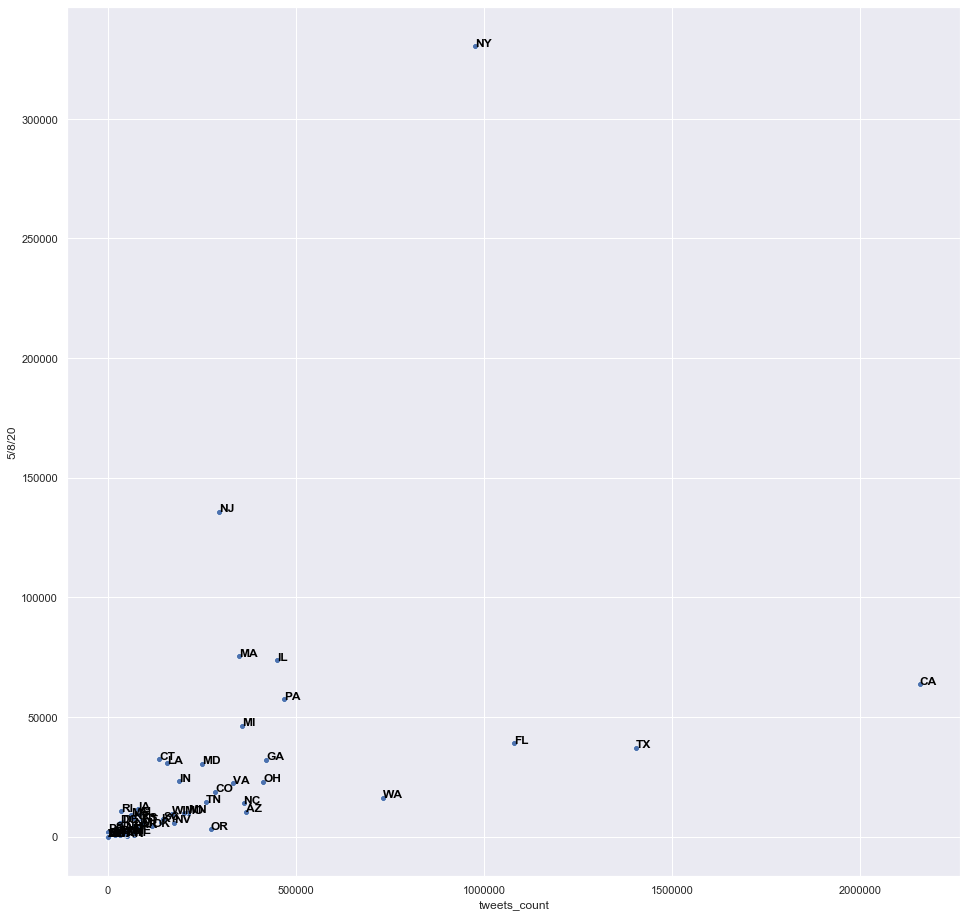

In [30]:
plt.figure()
ax = sns.scatterplot(x='tweets_count', 
                     y=cases_date, 
                     data=df_date, 
#                      hue='state_abb', 
                     palette="Set2")

# add annotations one by one with a loop
for line in range(df_date.shape[0]):
     ax.text(df_date['tweets_count'][line]+0.2, 
             df_date[cases_date][line], 
             df_date['state_abb'][line], 
             horizontalalignment='left', 
             size='medium', 
             color='black', 
             weight='semibold')

# plot line of total_tweets / total_ cases
# plt.plot([0, 0], [total_tweets, total_cases], 'k-', color = 'r')
plt.show()

## 2.2 Correlation of total tweets and cases in USA

In [218]:
tweets_date_daily = Counter(df['date'])
# drop date of 1/21/20
tweets_date_daily.pop("1/21/20", None)
date_order = sorted(tweets_date_daily)
# name format
for i in range(len(date_order)):
    x = str(date_order[i]).split('/')
    if len(x) > 1:
        if len(x[1]) == 1:
            x[1] = '0' + x[1]
            tweets_date_daily['/'.join(x)] = tweets_date_daily.pop(date_order[i])
print(tweets_date_daily)
date_order = sorted(tweets_date_daily)
print(date_order)

Counter({'2/29/20': 1029372, '2/28/20': 641168, '3/03/20': 395178, '3/04/20': 375084, '3/01/20': 353729, '2/27/20': 270173, '2/26/20': 222188, '1/30/20': 196901, '1/31/20': 182578, '1/29/20': 178279, '2/10/20': 175686, '2/17/20': 168664, '2/11/20': 166505, '2/07/20': 160376, '2/12/20': 156682, '2/21/20': 154354, '2/19/20': 151048, '2/09/20': 138524, '2/13/20': 132946, '4/07/20': 130346, '4/01/20': 129156, '4/23/20': 127106, '4/08/20': 125361, '5/06/20': 124662, '4/22/20': 124617, '2/24/20': 123910, '4/02/20': 123692, '2/15/20': 123294, '5/05/20': 122299, '4/20/20': 121636, '4/06/20': 120511, '4/04/20': 119574, '4/09/20': 119297, '5/07/20': 118802, '2/25/20': 118109, '4/16/20': 118077, '4/21/20': 117762, '2/05/20': 117392, '3/06/20': 116903, '4/05/20': 116670, '4/24/20': 116357, '4/03/20': 115863, '5/04/20': 115686, '4/15/20': 115107, '4/25/20': 114863, '3/07/20': 114750, '2/20/20': 113409, '4/10/20': 113206, '4/29/20': 112606, '5/03/20': 111901, '3/30/20': 111496, '4/19/20': 111293, '3

In [32]:
# match date format
c = list(df_date.columns)
c_new = list(df_date.columns)
for i in range(len(c)):
    x = str(c[i]).split('/')
    if len(x) > 1:
        if len(x[1]) == 1:
            x[1] = '0' + x[1]
            c_new[i] = '/'.join(x) 
df_date.rename(columns = {c[i]:c_new[i] for i in range(len(c))}, inplace = True) 
cd = df_date.columns
print([i for i in cd])

['Province_State', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/01/20', '2/02/20', '2/03/20', '2/04/20', '2/05/20', '2/06/20', '2/07/20', '2/08/20', '2/09/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/01/20', '3/02/20', '3/03/20', '3/04/20', '3/05/20', '3/06/20', '3/07/20', '3/08/20', '3/09/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/01/20', '4/02/20', '4/03/20', '4/04/20', '4/05/20', '4/06/20', '4/07/20', '4/08/20', '4/09/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4

In [167]:
# accumulate tweets data
tweets_date = {}
for i in range(len(date_order)):
    if i == 0:
        tweets_date[date_order[i]] = tweets_date_daily[date_order[i]]
    else:
        tweets_date[date_order[i]] = tweets_date_daily[date_order[i]] + tweets_date[date_order[i-1]]   
# total cases
cases_date = {key:df_date[key].sum() for key in tweets_date}

In [219]:
tweets_date_daily

Counter({'1/22/20': 5070,
         '1/25/20': 84869,
         '1/27/20': 101503,
         '1/28/20': 104838,
         '1/26/20': 108192,
         '1/30/20': 196901,
         '1/24/20': 74806,
         '1/29/20': 178279,
         '1/23/20': 24718,
         '1/31/20': 182578,
         '2/21/20': 154354,
         '2/09/20': 138524,
         '2/24/20': 123910,
         '2/10/20': 175686,
         '2/06/20': 87851,
         '2/12/20': 156682,
         '2/29/20': 1029372,
         '2/15/20': 123294,
         '2/27/20': 270173,
         '2/20/20': 113409,
         '2/19/20': 151048,
         '2/02/20': 105160,
         '2/14/20': 92476,
         '2/07/20': 160376,
         '2/13/20': 132946,
         '2/11/20': 166505,
         '2/05/20': 117392,
         '2/16/20': 95478,
         '2/28/20': 641168,
         '2/25/20': 118109,
         '2/22/20': 68925,
         '2/04/20': 93780,
         '2/03/20': 106798,
         '2/17/20': 168664,
         '2/26/20': 222188,
         '2/01/20': 58263,
  

In [34]:
def sentiment_percentage(key, sentiment):
    return (df[(df['date'] == key)]['sentiment']==sentiment).sum()/(df[(df['date'] == key)]['sentiment']).count()
# positive sentiment count
sentiment_pos =  {key:sentiment_percentage(key, 'positive') for key in date_order}
# negative sentiment count
sentiment_neg =  {key:sentiment_percentage(key, 'negative') for key in date_order}
# neutral sentiment count
sentiment_neut =  {key:sentiment_percentage(key, 'neutral') for key in date_order}

In [207]:
d = {
    'date':date_order, 
    'tweets':[tweets_date[i] for i in date_order], 
    'cases':[cases_date[i] for i in date_order],
    'sentiment_pos':[sentiment_pos[i] for i in date_order],
    'sentiment_neg':[sentiment_neg[i] for i in date_order],
    'sentiment_neut':[sentiment_neut[i] for i in date_order],
}
df_tweets_cases = pd.DataFrame(data=d)
df_tweets_cases

date    tweets    cases  sentiment_pos  sentiment_neg  sentiment_neut
0    1/22/20      5070        1       0.595661       0.178698        0.225641
1    1/23/20     29788        1       0.438628       0.243669        0.317704
2    1/24/20    104594        2       0.453894       0.201414        0.344692
3    1/25/20    189463        2       0.424336       0.217830        0.357834
4    1/26/20    297655        5       0.427416       0.224370        0.348214
..       ...       ...      ...            ...            ...             ...
102  5/04/20  13601803  1180375       0.407621       0.273369        0.319010
103  5/05/20  13724102  1204351       0.426978       0.247018        0.326004
104  5/06/20  13848764  1229331       0.421155       0.257087        0.321758
105  5/07/20  13967566  1257023       0.434942       0.260214        0.304843
106  5/08/20  14067296  1283929       0.439336       0.251690        0.308974

[107 rows x 6 columns]

In [ ]:
df_tweets_cases.

In [208]:
df_tweets_cases['sentiment_us'] = df_tweets_cases['sentiment_pos'] - df_tweets_cases['sentiment_neg']

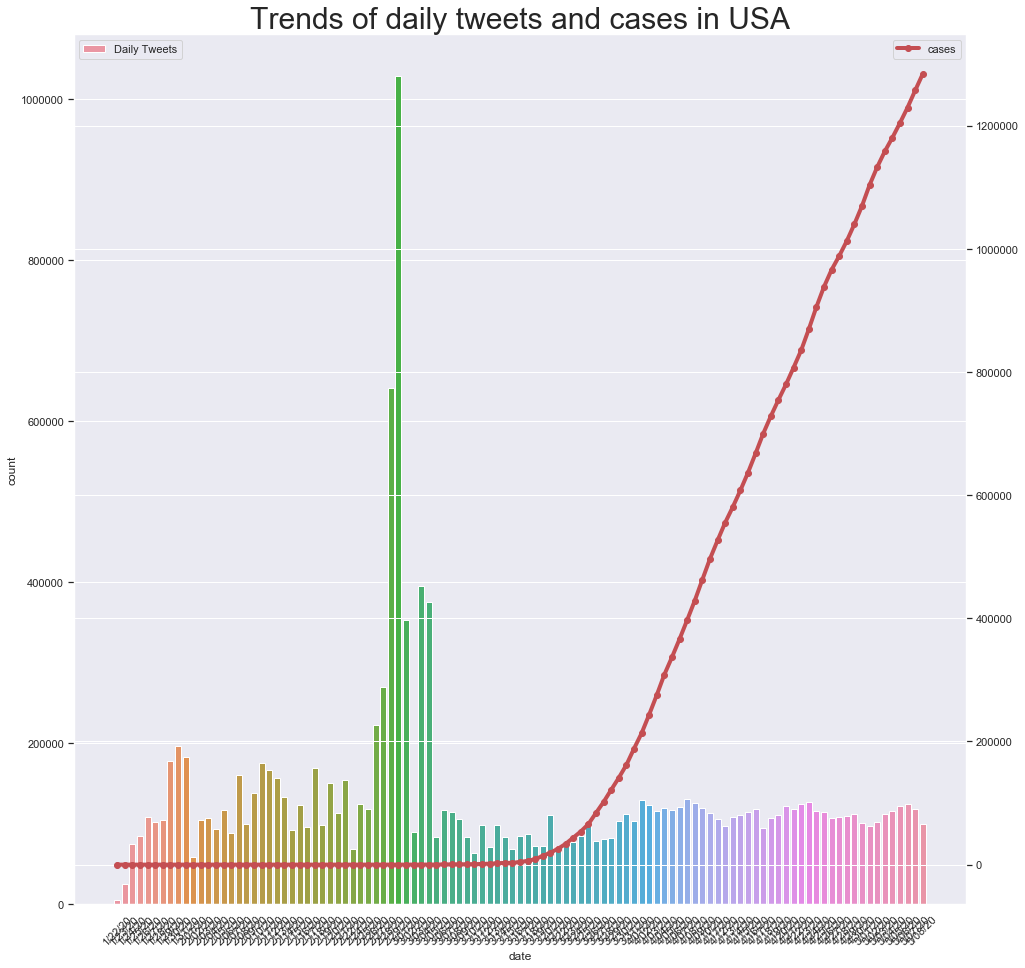

In [149]:
plt.figure()
ax1 = sns.countplot(x='date', 
                    data=df, 
                    label='Daily Tweets',
                    order=sorted(df['date'].unique()))

ax1.legend(loc=2)
plt.xticks(rotation=45)
ax2 = ax1.twinx()
df_tweets_cases.plot(x='date',
                     y='cases',
                     ax=ax2,
                     label='cases', 
                     style='ro-',
                     lw=4)
plt.title("Trends of daily tweets and cases in USA", fontsize=30, ha='center')
plt.xticks(rotation=45)
plt.show()

In [222]:
tweets_date_daily_dict = dict(tweets_date_daily)
df_tweets_cases['tweets_daily'] = df_tweets_cases['date'].apply(lambda x: tweets_date_daily_dict[x])

In [241]:
df_tweets_cases
#output data
df_tweets_cases.to_csv('csv/us_daily_analysis.csv', index=False)

In [213]:
cases_daily_next = []
count = 0
last = len(df_tweets_cases['cases'])
for i in range(len(df_tweets_cases['cases'])):
    if count == 0:
        cases_daily_next.append(0)
    else:
        cases_daily_next.append(df_tweets_cases['cases'][i-1])
    count += 1

cases_daily_counts = [i-j for i,j in zip(df_tweets_cases['cases'], cases_daily_next)]
cases_daily_counts_dict = {'cases_daily': cases_daily_counts}
df_cases_cases_daily = pd.DataFrame(data=cases_daily_counts_dict)
df_cases_cases_daily

cases_daily
0              1
1              0
2              1
3              0
4              3
..           ...
102        22335
103        23976
104        24980
105        27692
106        26906

[107 rows x 1 columns]

In [217]:
# add daily cases
df_tweets_cases = pd.concat([df_tweets_cases, 
                              df_cases_cases_daily.reindex(df_tweets_cases.index)],  
                              axis=1)
df_tweets_cases

date    tweets    cases  sentiment_pos  sentiment_neg  sentiment_neut  \
0    1/22/20      5070        1       0.595661       0.178698        0.225641   
1    1/23/20     29788        1       0.438628       0.243669        0.317704   
2    1/24/20    104594        2       0.453894       0.201414        0.344692   
3    1/25/20    189463        2       0.424336       0.217830        0.357834   
4    1/26/20    297655        5       0.427416       0.224370        0.348214   
..       ...       ...      ...            ...            ...             ...   
102  5/04/20  13601803  1180375       0.407621       0.273369        0.319010   
103  5/05/20  13724102  1204351       0.426978       0.247018        0.326004   
104  5/06/20  13848764  1229331       0.421155       0.257087        0.321758   
105  5/07/20  13967566  1257023       0.434942       0.260214        0.304843   
106  5/08/20  14067296  1283929       0.439336       0.251690        0.308974   

     sentiment_us  cases_daily  
0        0.416963            1  
1        0.194959            0  
2        0.252480            1  
3        0.206506            0  
4        0.203046            3  
..            ...          ...  
102      0.134251        22335  
103      0.179961        23976  
104      0.164068        24980  
105      0.174728        27692  
106      0.187647        26906  

[107 rows x 8 columns]

## 2.3 Correlation of sentiments and cases in USA

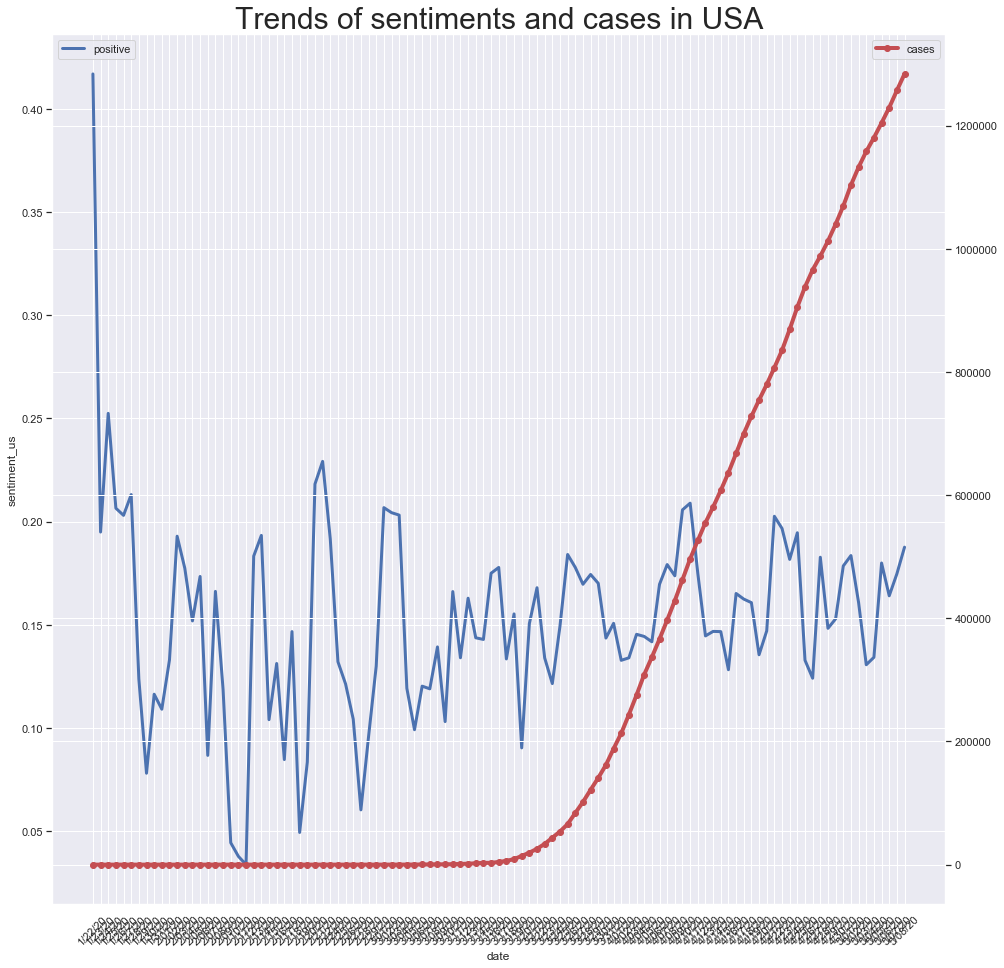

In [144]:
plt.figure()
ax_pos = sns.lineplot(x='date',
                      y='sentiment_us', 
                      data=df_tweets_cases,
                      label='positive',
                      lw=3)

ax_pos.legend(loc=2)
plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases.plot(x='date',
                     y='cases',
                     ax=ax2,
                     label='cases', 
                     style='ro-',
                     lw=4)
plt.title("Trends of sentiments and cases in USA", fontsize=30, ha='center')
plt.xticks(rotation=45)
plt.show()

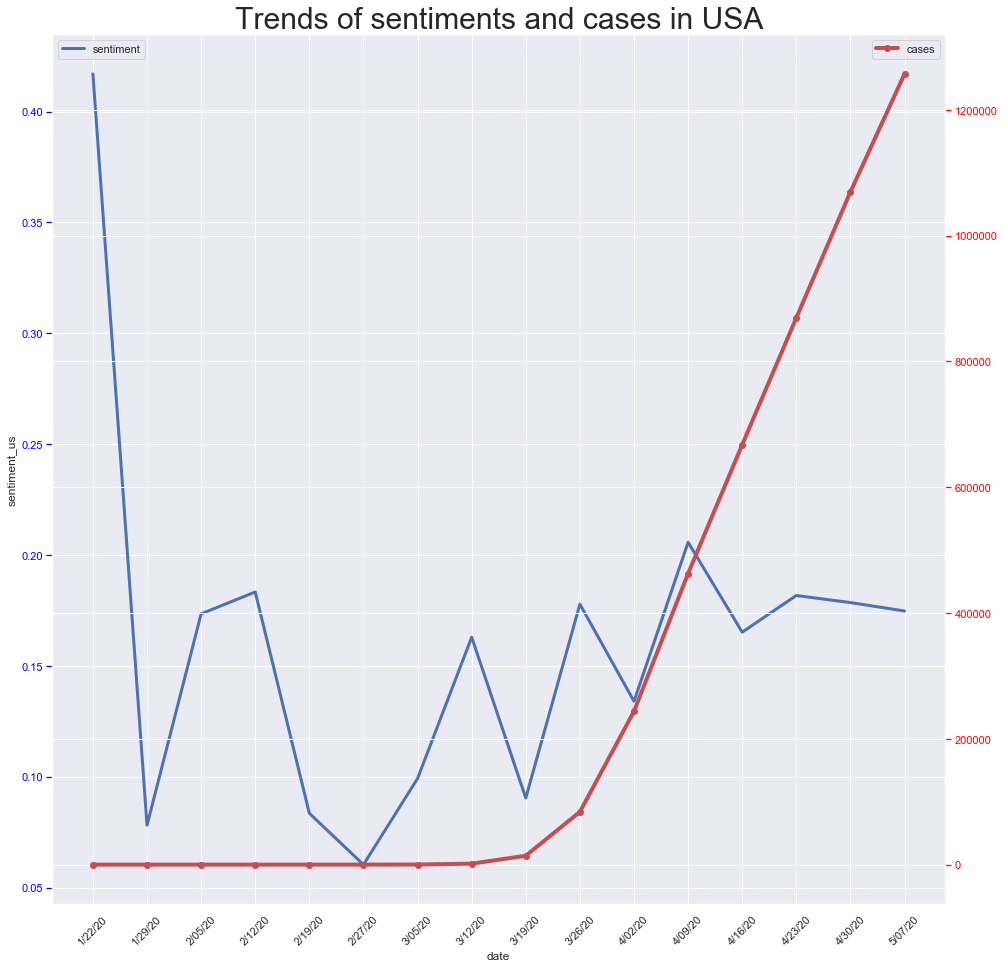

In [166]:
# plot every 7 rows
plt.figure()
ax_pos = sns.lineplot(x='date',
                      y='sentiment_us', 
                      data=df_tweets_cases_select,
                      label='sentiment',
                      lw=3)

ax_pos.legend(loc=2)
ax_pos.tick_params(axis='y', colors='blue')

plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases_select.plot(x='date',
                     y='cases',
                     ax=ax2,
                     label='cases', 
                     style='ro-',
                     lw=4)
ax2.tick_params(axis='y', colors='red')

plt.title("Trends of sentiments and cases in USA", fontsize=30, ha='center')
plt.xticks(rotation=45)
plt.show()

## Analysis for Daily

In [228]:
# every 5 rows
df_tweets_cases_select = df_tweets_cases.iloc[::5, :]
df_tweets_cases_select

date    tweets    cases  sentiment_pos  sentiment_neg  sentiment_neut  \
0    1/22/20      5070        1       0.595661       0.178698        0.225641   
5    1/27/20    399158        5       0.448351       0.235234        0.316414   
10   2/01/20   1120017        8       0.372810       0.239826        0.387364   
15   2/06/20   1630998       11       0.352825       0.266098        0.381077   
20   2/11/20   2372125       12       0.349575       0.315780        0.334645   
25   2/16/20   2973001       13       0.359475       0.274775        0.365749   
30   2/21/20   3658804       15       0.421499       0.192298        0.386203   
35   2/27/20   4462109       16       0.350557       0.290229        0.359214   
40   3/03/20   6970782       73       0.450506       0.247334        0.302160   
45   3/08/20   7765907      450       0.404148       0.264855        0.330997   
50   3/13/20   8180677     2147       0.397132       0.253412        0.349455   
55   3/18/20   8577648     8873       0.405537       0.250249        0.344214   
60   3/23/20   8983667    43663       0.396852       0.275330        0.327818   
65   3/28/20   9414189   121465       0.428433       0.254038        0.317529   
70   4/02/20   9985926   243622       0.390858       0.256856        0.352286   
75   4/07/20  10588890   397121       0.422967       0.243767        0.333267   
80   4/12/20  11150165   555313       0.402711       0.258084        0.339205   
85   4/17/20  11696710   699706       0.410112       0.247631        0.342257   
90   4/22/20  12278758   835150       0.439771       0.243081        0.317148   
95   4/27/20  12852705   988197       0.419523       0.236767        0.343711   
100  5/02/20  13374216  1132539       0.413327       0.252542        0.334131   
105  5/07/20  13967566  1257023       0.434942       0.260214        0.304843   

     sentiment_us  cases_daily  tweets_daily  
0        0.416963            1          5070  
5        0.213117            0        101503  
10       0.132983            1         58263  
15       0.086726            0         87851  
20       0.033795            1        166505  
25       0.084700            0         95478  
30       0.229200            2        154354  
35       0.060328            1        270173  
40       0.203172           20        395178  
45       0.139293          114        105454  
50       0.143720          590         98685  
55       0.155288         2777         72240  
60       0.121522        10029         76628  
65       0.174395        19808         82468  
70       0.134002        30380        123692  
75       0.179200        30804        130346  
80       0.144627        28917         97693  
85       0.162481        32114         94996  
90       0.196691        28127        124617  
95       0.182756        22412        108664  
100      0.160785        29078        101975  
105      0.174728        27692        118802

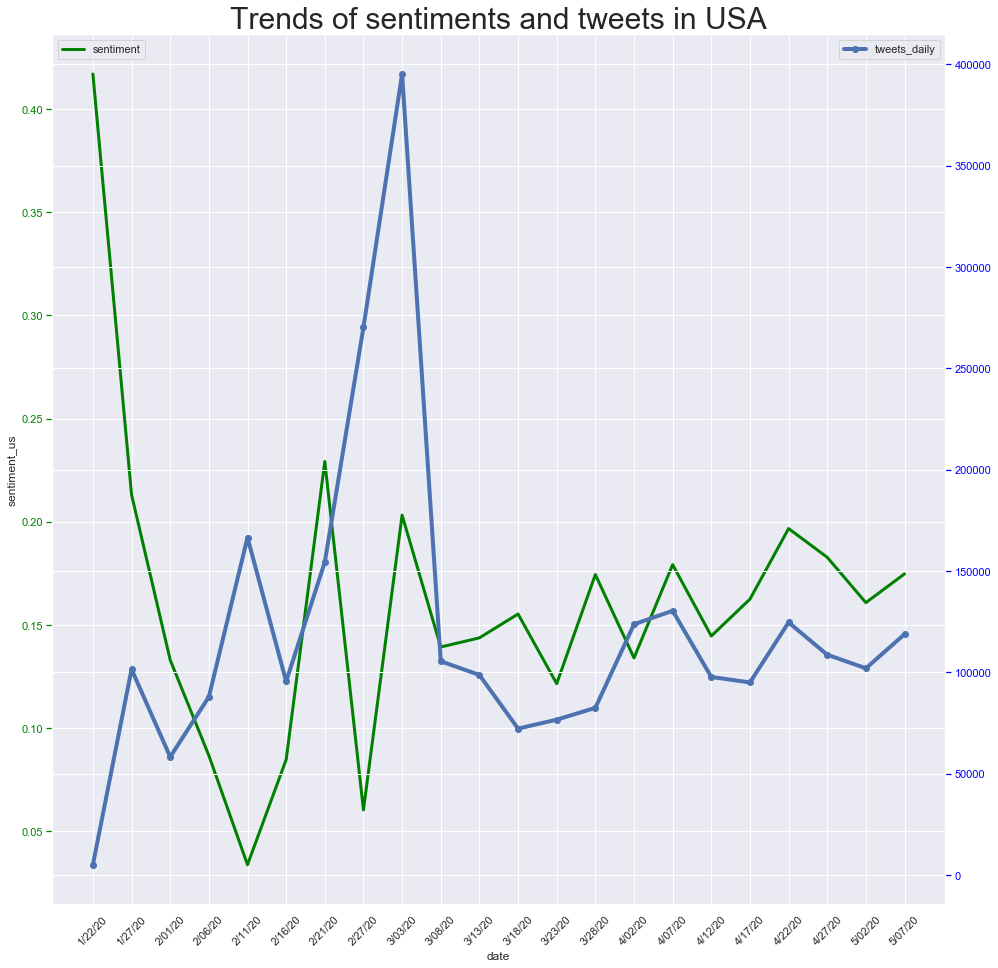

In [240]:
# plot every 5 rows
plt.figure()
ax_pos = sns.lineplot(x='date',
                      y='sentiment_us', 
                      data=df_tweets_cases_select,
                      label='sentiment',
                      color='green',
                      lw=3)

ax_pos.legend(loc=2)
ax_pos.tick_params(axis='y', colors='green')

plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases_select.plot(x='date',
                     y='tweets_daily',
                     ax=ax2,
                     label='tweets_daily', 
                     style='bo-',
                     lw=4)
ax2.tick_params(axis='y', colors='blue')

plt.title("Trends of sentiments and tweets in USA", fontsize=30, ha='center')
plt.xticks(rotation=45)
plt.show()

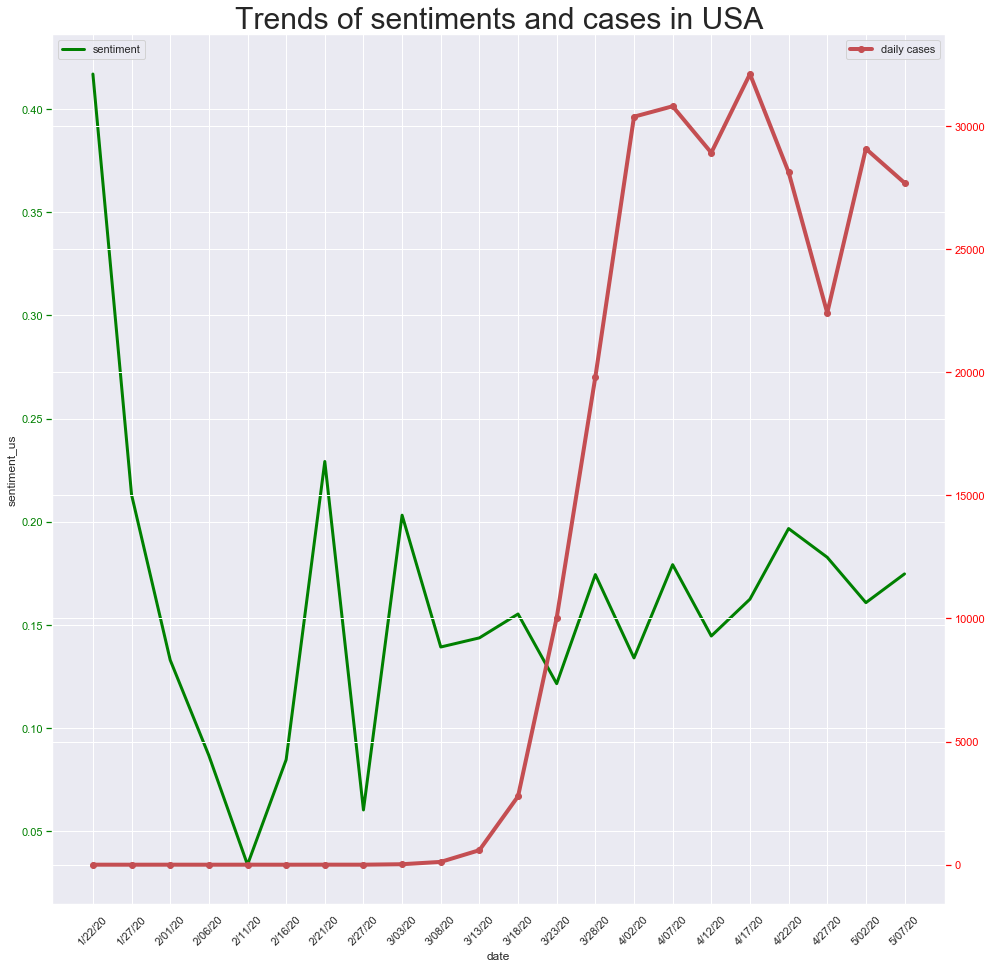

In [238]:
# plot every 5 rows
plt.figure()
ax_pos = sns.lineplot(x='date',
                      y='sentiment_us', 
                      data=df_tweets_cases_select,
                      label='sentiment',
                      color='green',
                      lw=3)

ax_pos.legend(loc=2)
ax_pos.tick_params(axis='y', colors='green')

plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases_select.plot(x='date',
                     y='cases_daily',
                     ax=ax2,
                     label='daily cases', 
                     style='ro-',
                     lw=4)
ax2.tick_params(axis='y', colors='red')

plt.title("Trends of sentiments and cases in USA", fontsize=30, ha='center')
plt.xticks(rotation=45)
plt.show()

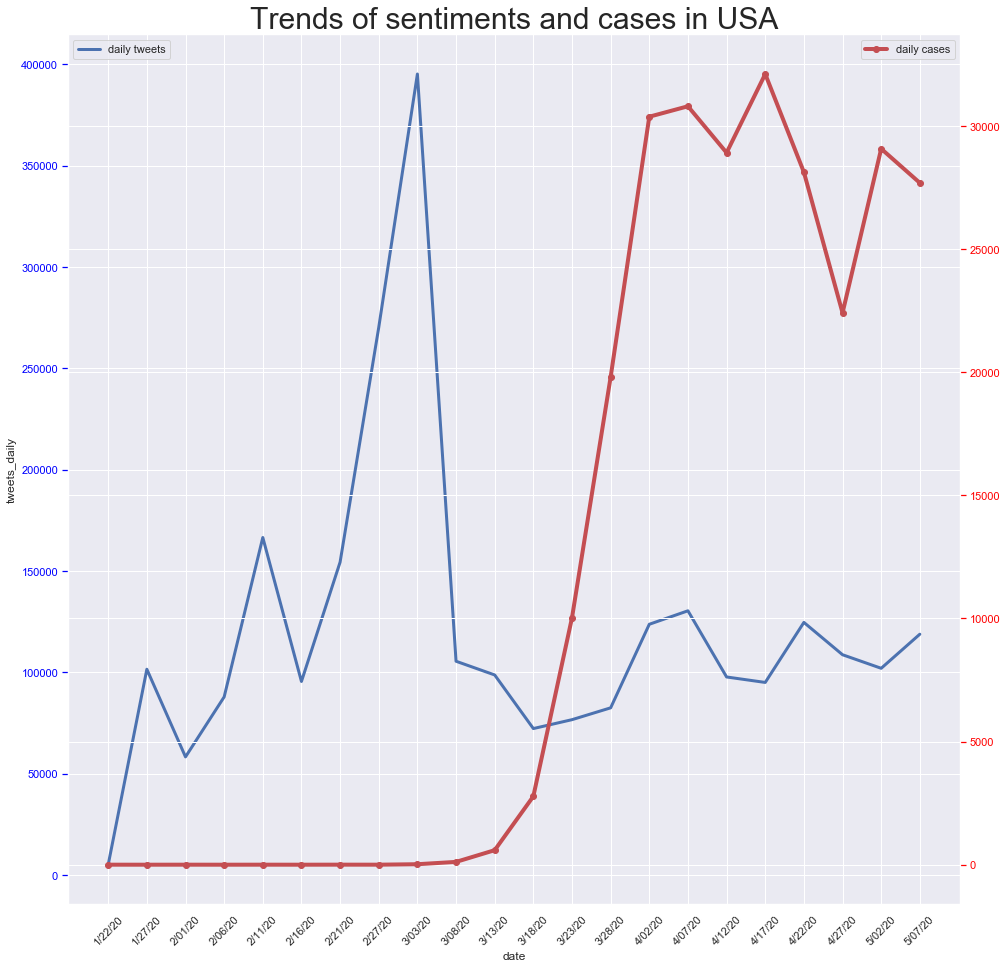

In [237]:
# plot every 5 rows
plt.figure()
ax_pos = sns.lineplot(x='date',
                      y='tweets_daily', 
                      data=df_tweets_cases_select,
                      label='daily tweets',
                      lw=3)

ax_pos.legend(loc=2)
ax_pos.tick_params(axis='y', colors='blue')

plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases_select.plot(x='date',
                     y='cases_daily',
                     ax=ax2,
                     label='daily cases', 
                     style='ro-',
                     lw=4)
ax2.tick_params(axis='y', colors='red')

plt.title("Trends of sentiments and cases in USA", fontsize=30, ha='center')
plt.xticks(rotation=45)
plt.show()

## 3. Sentiment analysis for single state

In [38]:
single_state = 'New York'
df_single_state = df[df['state']==single_state]
df_date_single_state = df_date[df_date['Province_State']==single_state]
tweets_count_single_state = Counter(df_single_state['state'])
df_date_single_state['tweets_count'] = df_date_single_state['state'].apply(lambda x: tweets_count_single_state[x])

/Users/allen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
tweets_date_daily_single_state = Counter(df_single_state['date'])
# drop date of 1/21/20
tweets_date_daily_single_state.pop("1/21/20", None)
date_order_single_state = sorted(tweets_date_daily_single_state)
# name format
for i in range(len(date_order_single_state)):
    x = str(date_order_single_state[i]).split('/')
    if len(x) > 1:
        if len(x[1]) == 1:
            x[1] = '0' + x[1]
            tweets_date_daily_single_state['/'.join(x)] = tweets_date_daily_single_state.pop(date_order_single_state[i])
# print(tweets_date_daily_single_state)
date_order_single_state = sorted(tweets_date_daily_single_state)
print(date_order_single_state)

['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/01/20', '2/02/20', '2/03/20', '2/04/20', '2/05/20', '2/06/20', '2/07/20', '2/08/20', '2/09/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/01/20', '3/02/20', '3/03/20', '3/04/20', '3/05/20', '3/06/20', '3/07/20', '3/08/20', '3/09/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/01/20', '4/02/20', '4/03/20', '4/04/20', '4/05/20', '4/06/20', '4/07/20', '4/08/20', '4/09/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20'

In [40]:
# accumulate tweets data
tweets_date_single_state = {}
for i in range(len(date_order_single_state)):
    if i == 0:
        tweets_date_single_state[date_order_single_state[i]] = tweets_date_daily_single_state[date_order_single_state[i]]
    else:
        tweets_date_single_state[date_order_single_state[i]] = tweets_date_daily_single_state[date_order_single_state[i]] + tweets_date_single_state[date_order_single_state[i-1]]   
print("tweets_data: ")
print(tweets_date_single_state)
# total cases
cases_date_single_state = {key:df_date_single_state[key].sum() for key in tweets_date_single_state}
print("cases_date: ")
print(cases_date_single_state)

tweets_data: 
{'1/22/20': 423, '1/23/20': 2254, '1/24/20': 7649, '1/25/20': 13378, '1/26/20': 20512, '1/27/20': 28101, '1/28/20': 35585, '1/29/20': 47749, '1/30/20': 62137, '1/31/20': 75862, '2/01/20': 80524, '2/02/20': 89170, '2/03/20': 98175, '2/04/20': 105920, '2/05/20': 115062, '2/06/20': 121695, '2/07/20': 133955, '2/08/20': 140862, '2/09/20': 150556, '2/10/20': 162720, '2/11/20': 174241, '2/12/20': 185759, '2/13/20': 195356, '2/14/20': 202073, '2/15/20': 211337, '2/16/20': 218360, '2/17/20': 231278, '2/18/20': 238473, '2/19/20': 249815, '2/20/20': 258261, '2/21/20': 269539, '2/22/20': 274245, '2/24/20': 282941, '2/25/20': 290562, '2/26/20': 305084, '2/27/20': 322388, '2/28/20': 360852, '2/29/20': 424560, '3/01/20': 446278, '3/02/20': 453408, '3/03/20': 482703, '3/04/20': 510316, '3/05/20': 516122, '3/06/20': 524416, '3/07/20': 532552, '3/08/20': 539983, '3/09/20': 546075, '3/10/20': 550792, '3/11/20': 557958, '3/12/20': 562596, '3/13/20': 568919, '3/14/20': 574467, '3/15/20': 579

In [41]:
def sentiment_percentage(key, sentiment):
    return (df_single_state[(df_single_state['date'] == key)]['sentiment']==sentiment).sum()/(df_single_state[(df_single_state['date'] == key)]['sentiment']).count()
# positive sentiment count
sentiment_pos_single_state =  {key:sentiment_percentage(key, 'positive') for key in date_order_single_state}
# negative sentiment count
sentiment_neg_single_state =  {key:sentiment_percentage(key, 'negative') for key in date_order_single_state}
# neutral sentiment count
sentiment_neut_single_state =  {key:sentiment_percentage(key, 'neutral') for key in date_order_single_state}

In [42]:
d_single_state = {
    'date':date_order_single_state, 
    'tweets':[tweets_date_single_state[i] for i in date_order_single_state], 
    'cases':[cases_date_single_state[i] for i in date_order_single_state],
    'sentiment_pos':[sentiment_pos_single_state[i] for i in date_order_single_state],
    'sentiment_neg':[sentiment_neg_single_state[i] for i in date_order_single_state],
    'sentiment_neut':[sentiment_neut_single_state[i] for i in date_order_single_state],
}
df_tweets_cases_single_state = pd.DataFrame(data=d_single_state)
df_tweets_cases_single_state.head()

date  tweets  cases  sentiment_pos  sentiment_neg  sentiment_neut
0  1/22/20     423      0       0.600473       0.222222        0.177305
1  1/23/20    2254      0       0.438012       0.244675        0.317313
2  1/24/20    7649      0       0.477108       0.203336        0.319555
3  1/25/20   13378      0       0.438296       0.215046        0.346657
4  1/26/20   20512      0       0.408046       0.233109        0.358845

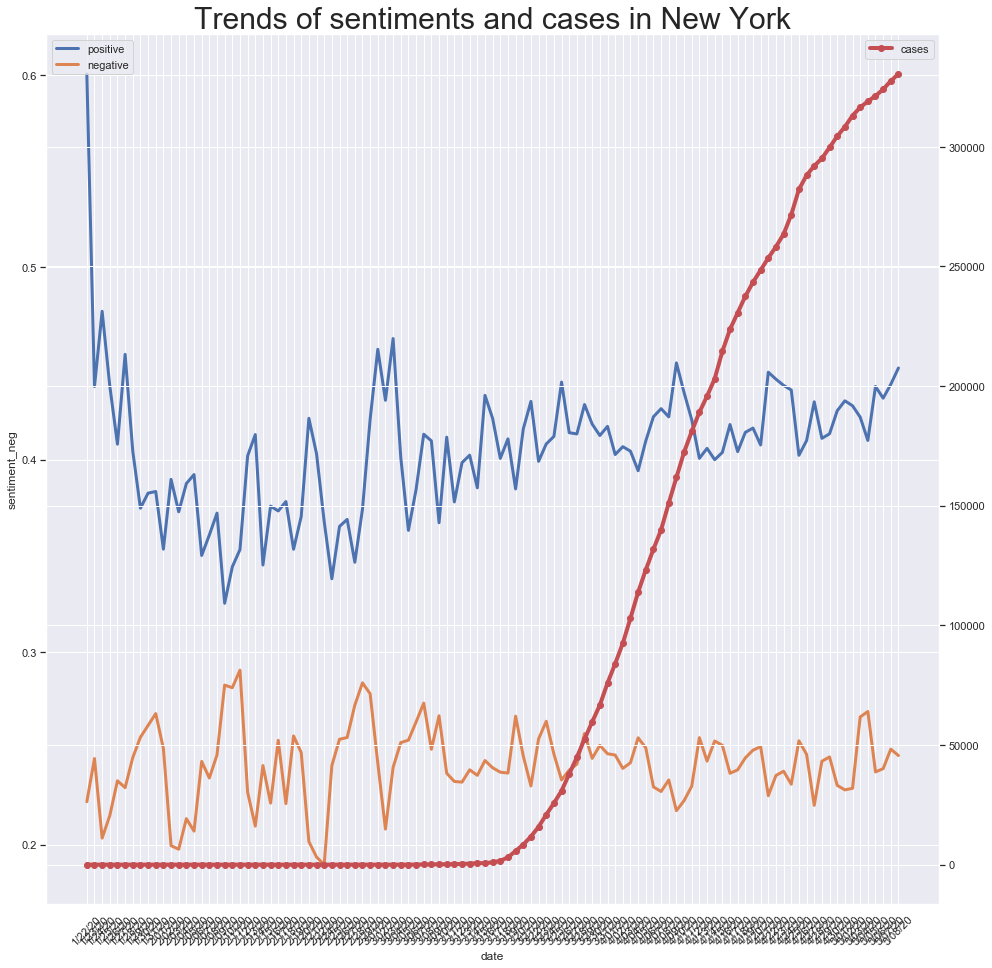

In [43]:
plt.figure()
ax_pos = sns.lineplot(x='date',
                      y='sentiment_pos', 
                      data=df_tweets_cases_single_state,
                      label='positive',
                      lw=3)
ax_neg = sns.lineplot(x='date',
                      y='sentiment_neg', 
                      data=df_tweets_cases_single_state,
                      label='negative',
                      lw=3)
ax_pos.legend(loc=2)
plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases_single_state.plot(x='date',
                     y='cases',
                     ax=ax2,
                     label='cases', 
                     style='ro-',
                     lw=4)
plt.title("Trends of sentiments and cases in %s" % single_state, fontsize=30, ha='center')
plt.xticks(rotation=45)
plt.show()

## Integrate data

In [68]:
def data_extract(single_state):
    df_single_state = df[df['state']==single_state]
    df_date_single_state = df_date[df_date['Province_State']==single_state]
    tweets_count_single_state = Counter(df_single_state['state'])
    df_date_single_state['tweets_count'] = df_date_single_state['state'].apply(lambda x: tweets_count_single_state[x])

    tweets_date_daily_single_state = Counter(df_single_state['date'])
    # drop date of 1/21/20
    tweets_date_daily_single_state.pop("1/21/20", None)
    date_order_single_state = sorted(tweets_date_daily_single_state)

    # date name format
    for i in range(len(date_order_single_state)):
        x = str(date_order_single_state[i]).split('/')
        if len(x) > 1:
            if len(x[1]) == 1:
                x[1] = '0' + x[1]
                tweets_date_daily_single_state['/'.join(x)] = tweets_date_daily_single_state.pop(date_order_single_state[i])
    # print(tweets_date_daily_single_state)
    date_order_single_state = sorted(tweets_date_daily_single_state)

    def sentiment_percentage(key, sentiment):
        return (df_single_state[(df_single_state['date'] == key)]['sentiment']==sentiment).sum()/(df_single_state[(df_single_state['date'] == key)]['sentiment']).count()
    # positive sentiment count
    sentiment_pos_single_state =  {key:sentiment_percentage(key, 'positive') for key in date_order_single_state}
    # negative sentiment count
    sentiment_neg_single_state =  {key:sentiment_percentage(key, 'negative') for key in date_order_single_state}
    # neutral sentiment count
    sentiment_neut_single_state =  {key:sentiment_percentage(key, 'neutral') for key in date_order_single_state}


    # accumulate tweets data
    tweets_date_single_state = {}
    for i in range(len(date_order_single_state)):
        if i == 0:
            tweets_date_single_state[date_order_single_state[i]] = tweets_date_daily_single_state[date_order_single_state[i]]
        else:
            tweets_date_single_state[date_order_single_state[i]] = tweets_date_daily_single_state[date_order_single_state[i]] + tweets_date_single_state[date_order_single_state[i-1]]   
    # total cases
    cases_date_single_state = {key:df_date_single_state[key].sum() for key in tweets_date_single_state}
    
    
    tweet = [tweets_date_single_state[i] for i in date_order_single_state] 
    case = [cases_date_single_state[i] for i in date_order_single_state]
#     'sentiment_pos':[sentiment_pos_single_state[i] for i in date_order_single_state],
#     'sentiment_neg':[sentiment_neg_single_state[i] for i in date_order_single_state],
#     'sentiment_neut':[sentiment_neut_single_state[i] for i in date_order_single_state],
#     sentiment = [sentiment_pos_single_state[i]-sentiment_neg_single_state[i] for i in date_order_single_state]
    sentiment = [sentiment_pos_single_state[i] for i in date_order_single_state]
    
    return tweet, case, sentiment




In [69]:
single_state = 'Texas'
tweet, case, sentiment = data_extract(single_state)

d_single_state = {
    'tweet_%s'%states_full_dic[single_state]:tweet, 
    'case_%s'%states_full_dic[single_state]:case,
#     'sentiment_pos':[sentiment_pos_single_state[i] for i in date_order_single_state],
#     'sentiment_neg':[sentiment_neg_single_state[i] for i in date_order_single_state],
#     'sentiment_neut':[sentiment_neut_single_state[i] for i in date_order_single_state],
    'sentiment_%s'%states_full_dic[single_state]:sentiment,
}

df_tweets_cases_single_state = pd.DataFrame(data=d_single_state)
df_tweets_cases_single_state

/Users/allen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



tweets_TX  cases_TX  sentiment_TX
0          433         0      0.642032
1         3170         0      0.403361
2        12642         0      0.408256
3        22660         0      0.386205
4        34781         0      0.364244
..         ...       ...           ...
102    1359133     32783      0.411529
103    1370515     33912      0.409506
104    1382610     34928      0.410831
105    1393966     36036      0.420042
106    1403055     37246      0.428100

[107 rows x 3 columns]

In [122]:
# Organize dataset for us
d_overall = {
    'date':d['date'], 
    'case_us':d['cases'],
    'tweet_us':d['tweets'], 
    'sentiment_us':[p-n for p, n in zip(d['sentiment_pos'], d['sentiment_neg'])]
}
df_overall = pd.DataFrame(data=d_overall)
df_overall



date  case_us  tweet_us  sentiment_us
0    1/22/20        1      5070      0.416963
1    1/23/20        1     29788      0.194959
2    1/24/20        2    104594      0.252480
3    1/25/20        2    189463      0.206506
4    1/26/20        5    297655      0.203046
..       ...      ...       ...           ...
102  5/04/20  1180375  13601803      0.134251
103  5/05/20  1204351  13724102      0.179961
104  5/06/20  1229331  13848764      0.164068
105  5/07/20  1257023  13967566      0.174728
106  5/08/20  1283929  14067296      0.187647

[107 rows x 4 columns]

In [113]:
states_full_dic = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    # 'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    # 'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    # 'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    # 'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    # 'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [114]:
# dictionary of tweet, case, sentiment for each state
df_tweets_all = dict()
df_cases_all = dict()
df_sentiment_all = dict()

for single_state, single_state_abb in states_full_dic.items():
    print("Analyzing at state: ", single_state)
    tweet, case, sentiment = data_extract(single_state)
    df_cases_all['case_%s'%single_state_abb] = case
    df_tweets_all['tweet_%s'%single_state_abb] = tweet
    df_sentiment_all['sentiment_%s'%single_state_abb] = sentiment
    

Analyzing at state:  Alabama


/Users/allen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Analyzing at state:  Alaska
Analyzing at state:  Arizona
Analyzing at state:  Arkansas
Analyzing at state:  California
Analyzing at state:  Colorado
Analyzing at state:  Connecticut
Analyzing at state:  Delaware
Analyzing at state:  District of Columbia
Analyzing at state:  Florida
Analyzing at state:  Georgia
Analyzing at state:  Hawaii
Analyzing at state:  Idaho
Analyzing at state:  Illinois
Analyzing at state:  Indiana
Analyzing at state:  Iowa
Analyzing at state:  Kansas
Analyzing at state:  Kentucky
Analyzing at state:  Louisiana
Analyzing at state:  Maine
Analyzing at state:  Maryland
Analyzing at state:  Massachusetts
Analyzing at state:  Michigan
Analyzing at state:  Minnesota
Analyzing at state:  Mississippi
Analyzing at state:  Missouri
Analyzing at state:  Montana
Analyzing at state:  Nebraska
Analyzing at state:  Nevada
Analyzing at state:  New Hampshire
Analyzing at state:  New Jersey
Analyzing at state:  New Mexico
Analyzing at state:  New York
Analyzing at state:  North 

In [115]:
print(len(df_tweets_all))
print(len(df_cases_all))
print(len(df_sentiment_all))

51
51
51


In [116]:
for key, values in df_cases_all.items():
    if len(values) == 0:
        print("%s, %i " % (key, len(values)))

In [118]:
df_case_overall = pd.DataFrame(data=df_cases_all)
df_tweet_overall = pd.DataFrame(data=df_tweets_all)
df_sentiment_overall = pd.DataFrame(data=df_sentiment_all)

df_state_overall = pd.concat([df_case_overall, 
                              df_tweet_overall.reindex(df_case_overall.index), 
                              df_sentiment_overall.reindex(df_case_overall.index)], 
                              axis=1)
df_state_overall

case_AL  case_AK  case_AZ  case_AR  case_CA  case_CO  case_CT  case_DE  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        1        0        2        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
102     8112      370     8924     3491    55884    16918    29973     5288   
103     8437      371     9305     3525    58456    17367    30621     5371   
104     8691      372     9707     3611    60616    17832    30995     5778   
105     9046      374     9945     3703    62148    18370    31784     5939   
106     9385      377    10526     3747    63779    18827    32411     6111   

     case_DC  case_FL  ...  sentiment_SD  sentiment_TN  sentiment_TX  \
0          0        0  ...      0.222222      0.621951      0.642032   
1          0        0  ...      0.475610      0.423480      0.403361   
2          0        0  ...      0.422131      0.475862      0.408256   
3          0        0  ...      0.477922      0.400275      0.386205   
4          0        0  ...      0.445902      0.430960      0.364244   
..       ...      ...  ...           ...           ...           ...   
102     5170    36897  ...      0.415584      0.406190      0.411529   
103     5322    37439  ...      0.405405      0.432842      0.409506   
104     5461    38002  ...      0.451852      0.415535      0.410831   
105     5654    38828  ...      0.466667      0.431337      0.420042   
106     5899    39199  ...      0.384000      0.440563      0.428100   

     sentiment_UT  sentiment_VT  sentiment_VA  sentiment_WA  sentiment_WV  \
0        0.555556      0.714286      0.624000      0.627706      0.653846   
1        0.385714      0.450000      0.432039      0.497185      0.415842   
2        0.486239      0.445455      0.470508      0.500383      0.451264   
3        0.463529      0.500000      0.434902      0.470181      0.396491   
4        0.394231      0.517857      0.395378      0.449980      0.443452   
..            ...           ...           ...           ...           ...   
102      0.431193      0.422907      0.414026      0.433664      0.411236   
103      0.426323      0.422481      0.424565      0.441323      0.430108   
104      0.404891      0.420074      0.424908      0.446008      0.426160   
105      0.443069      0.463203      0.448017      0.443680      0.456818   
106      0.464223      0.456140      0.460510      0.457701      0.459215   

     sentiment_WI  sentiment_WY  
0        0.597015      1.000000  
1        0.388889      0.352941  
2        0.484472      0.484076  
3        0.430845      0.388889  
4        0.388258      0.434109  
..            ...           ...  
102      0.411285      0.304054  
103      0.412981      0.413793  
104      0.426462      0.419540  
105      0.431089      0.389222  
106      0.442279      0.378788  

[107 rows x 153 columns]

In [123]:

df_overall_data =  pd.concat([df_overall, df_state_overall.reindex(df_overall.index)], axis=1)
df_overall_data

date  case_us  tweet_us  sentiment_us  case_AL  case_AK  case_AZ  \
0    1/22/20        1      5070      0.416963        0        0        0   
1    1/23/20        1     29788      0.194959        0        0        0   
2    1/24/20        2    104594      0.252480        0        0        0   
3    1/25/20        2    189463      0.206506        0        0        0   
4    1/26/20        5    297655      0.203046        0        0        1   
..       ...      ...       ...           ...      ...      ...      ...   
102  5/04/20  1180375  13601803      0.134251     8112      370     8924   
103  5/05/20  1204351  13724102      0.179961     8437      371     9305   
104  5/06/20  1229331  13848764      0.164068     8691      372     9707   
105  5/07/20  1257023  13967566      0.174728     9046      374     9945   
106  5/08/20  1283929  14067296      0.187647     9385      377    10526   

     case_AR  case_CA  case_CO  ...  sentiment_SD  sentiment_TN  sentiment_TX  \
0          0        0        0  ...      0.222222      0.621951      0.642032   
1          0        0        0  ...      0.475610      0.423480      0.403361   
2          0        0        0  ...      0.422131      0.475862      0.408256   
3          0        0        0  ...      0.477922      0.400275      0.386205   
4          0        2        0  ...      0.445902      0.430960      0.364244   
..       ...      ...      ...  ...           ...           ...           ...   
102     3491    55884    16918  ...      0.415584      0.406190      0.411529   
103     3525    58456    17367  ...      0.405405      0.432842      0.409506   
104     3611    60616    17832  ...      0.451852      0.415535      0.410831   
105     3703    62148    18370  ...      0.466667      0.431337      0.420042   
106     3747    63779    18827  ...      0.384000      0.440563      0.428100   

     sentiment_UT  sentiment_VT  sentiment_VA  sentiment_WA  sentiment_WV  \
0        0.555556      0.714286      0.624000      0.627706      0.653846   
1        0.385714      0.450000      0.432039      0.497185      0.415842   
2        0.486239      0.445455      0.470508      0.500383      0.451264   
3        0.463529      0.500000      0.434902      0.470181      0.396491   
4        0.394231      0.517857      0.395378      0.449980      0.443452   
..            ...           ...           ...           ...           ...   
102      0.431193      0.422907      0.414026      0.433664      0.411236   
103      0.426323      0.422481      0.424565      0.441323      0.430108   
104      0.404891      0.420074      0.424908      0.446008      0.426160   
105      0.443069      0.463203      0.448017      0.443680      0.456818   
106      0.464223      0.456140      0.460510      0.457701      0.459215   

     sentiment_WI  sentiment_WY  
0        0.597015      1.000000  
1        0.388889      0.352941  
2        0.484472      0.484076  
3        0.430845      0.388889  
4        0.388258      0.434109  
..            ...           ...  
102      0.411285      0.304054  
103      0.412981      0.413793  
104      0.426462      0.419540  
105      0.431089      0.389222  
106      0.442279      0.378788  

[107 rows x 157 columns]

In [131]:
#output data
df_overall_data.to_csv('csv/us_case_tweet_sentiment_analysis.csv', index=False)

In [127]:
df_tweets_all_states

date  case_us  tweet_us  sentiment_us
0    1/22/20        1      5070      0.416963
1    1/23/20        1     29788      0.194959
2    1/24/20        2    104594      0.252480
3    1/25/20        2    189463      0.206506
4    1/26/20        5    297655      0.203046
..       ...      ...       ...           ...
102  5/04/20  1180375  13601803      0.134251
103  5/05/20  1204351  13724102      0.179961
104  5/06/20  1229331  13848764      0.164068
105  5/07/20  1257023  13967566      0.174728
106  5/08/20  1283929  14067296      0.187647

[107 rows x 4 columns]

In [139]:
# seperate data:
# Tweets
d_tweets_all_state = dict()
for key, value in zip(states_full_dic.values(), df_tweets_all.values()):
    d_tweets_all_state[key] = value
df_tweets_all_state_one = pd.DataFrame(data=d_tweets_all_state)


df_tweets_all_states = df_overall
df_tweets_all_states = df_tweets_all_states[['date', 'tweet_us']]

df_tweets_all_states_out =  pd.concat([df_tweets_all_states, df_tweets_all_state_one.reindex(df_overall.index)], axis=1)

#output data
df_tweets_all_states_out.to_csv('csv/us_tweet_analysis.csv', index=False)    

In [137]:
# seperate data:
# Cases
d_cases_all_state = dict()
for key, value in zip(states_full_dic.values(), df_cases_all.values()):
    d_cases_all_state[key] = value
df_cases_all_state_one = pd.DataFrame(data=d_cases_all_state)


df_cases_all_states = df_overall
df_cases_all_states = df_cases_all_states[['date', 'tweet_us']]

df_cases_all_states_out =  pd.concat([df_cases_all_states, df_cases_all_state_one.reindex(df_overall.index)], axis=1)

#output data
df_cases_all_states_out.to_csv('csv/us_case_analysis.csv', index=False)   

In [138]:
# seperate data:
# Cases
d_sentiments_all_state = dict()
for key, value in zip(states_full_dic.values(), df_sentiment_all.values()):
    d_sentiments_all_state[key] = value
df_sentiments_all_state_one = pd.DataFrame(data=d_sentiments_all_state)


df_sentiments_all_states = df_overall
df_sentiments_all_states = df_sentiments_all_states[['date', 'sentiment_us']]

df_sentiments_all_states_out =  pd.concat([df_sentiments_all_states, df_sentiments_all_state_one.reindex(df_overall.index)], axis=1)

#output data
df_sentiments_all_states_out.to_csv('csv/us_sentiments_analysis.csv', index=False)  